## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 0 csv file in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0804.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0022.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0401.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0600.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0176.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0190.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0775.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0683.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0364.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0171.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0295.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0827.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0184.jpg
/kaggle/input/iitd-preprocessed/trainTestVal/validation/0/img0564.jpg
/kaggle/input/iitd-p

In [3]:
# len(os.listdir('/kaggle/input/sapienza university mobile palmprint database(smpd)/Sapienza University Mobile Palmprint Database(SMPD)'))
!ls '/kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset'
import cv2
cv2.imread('/kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset/0008/0008_0007.bmp').shape

0001  0009  0017  0025	0033  0041  0049  0057	0065  0073  0081  0089	0097
0002  0010  0018  0026	0034  0042  0050  0058	0066  0074  0082  0090	0098
0003  0011  0019  0027	0035  0043  0051  0059	0067  0075  0083  0091	0099
0004  0012  0020  0028	0036  0044  0052  0060	0068  0076  0084  0092	0100
0005  0013  0021  0029	0037  0045  0053  0061	0069  0077  0085  0093
0006  0014  0022  0030	0038  0046  0054  0062	0070  0078  0086  0094
0007  0015  0023  0031	0039  0047  0055  0063	0071  0079  0087  0095
0008  0016  0024  0032	0040  0048  0056  0064	0072  0080  0088  0096


(150, 150, 3)

In [4]:

# Selects top view images from the Sapienza University Mobile Palmprint Database:SMPD,
# applies a noise filter and processes them to have the same orientation.
# https://www.kaggle.com/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd

import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from scipy.signal import filtfilt, butter, find_peaks


def rotateImg(img, angle):
    center = tuple(np.array(img.shape[1::-1]) / 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Apply the rotation matrix to the input image
    rotated = cv2.warpAffine(img, M, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated


def plotTwoCurves(x, y1, y2):
    fig, ax = plt.subplots()
    ax.plot(x, y1, color='red', label='top')

    # Plot the second curve (in red) on the same axis
    ax.plot(x, y2, color='blue', label='bottom')

    # Set the axis labels and title
    ax.set_xlabel('x (pixel pos''n)')
    ax.set_ylabel('intensity')
    ax.set_title('top & bottom image intensity')
    # Add a legend to the plot
    ax.legend()
    # Display the plot
    plt.show()

raw_data_folder = '/kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset'    # folder with image inputs
processed_folder = '/kaggle/working/selected_palmprints'    # folder with image outputs

#fiter_coeffs
f_b, f_a = butter(2, 1/10, btype='lowpass', analog=False)

if os.path.isdir(processed_folder) is False:
    os.makedirs(processed_folder)
    for folder in glob.glob(os.path.join(raw_data_folder, '*')):
        if os.path.isdir(folder):
            delimiter = '/'
            substrs = folder.split(delimiter)
            folderName = substrs[-1]
            #if folderName != '044':     #in case you want to work on a specific class
            #    continue
            for file in glob.glob(os.path.join(folder, '*')):
                if os.path.isfile(file):  #only process top view images
                    print('Processing file '+file)
                    delimiter = '/'
                    substrs = file.split(delimiter)
                    fileName = substrs[-1]
                    img = cv2.imread(file)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.medianBlur(img, 5)  # median filter image
                    [ln, wd, _] = img.shape
                    #make sure the images all have the same alignment
                    if wd > ln:
                        img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
                        [ln, wd, _] = img.shape
                    gr_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    rd_img = img[:,:,1]

                    # check the intensity of top and bottom parts of the image
                    topStrip = rd_img[1:ln//55, :]
                    topStrip = np.mean(topStrip, axis=0)/255
                    bottomStrip = rd_img[54*ln//55:, :]
                    bottomStrip = np.mean(bottomStrip, axis=0)/255

                    topStrip = filtfilt(f_b, f_a, topStrip)
                    bottomStrip = filtfilt(f_b, f_a, bottomStrip)

                    # count the number of peaks. Fingers generate multiple peaks and wrist generates a single peak
                    minTop = np.min(topStrip)
                    maxTop = np.max(topStrip)
                    minBottom = np.min(bottomStrip)
                    maxBottom = np.max(bottomStrip)
                    diffTop = maxTop-minTop
                    diffBottom = maxBottom-minBottom
                    avgDiff = diffTop/2 + diffBottom/2
                    topStrip = np.pad(topStrip, (1, 1), mode='constant', constant_values=minTop)
                    bottomStrip = np.pad(bottomStrip, (1, 1), mode='constant', constant_values=minBottom)

                    count = 0
                    peaksTop = np.array([0])
                    peaksBottom = np.array([0])

                    #plotTwoCurves(range(wd+2), topStrip-np.mean(topStrip), bottomStrip-np.mean(bottomStrip))

                    # make sure the fingers are on top. If not rotate image
                    while count < 3 and  len(peaksTop) == len(peaksBottom):
                        peaksTop, _ = find_peaks(topStrip, prominence=avgDiff/(3+count), distance=wd//9, width=wd//20)
                        peaksBottom, _ = find_peaks(bottomStrip, prominence=avgDiff / (3+count), distance=wd//9, width=wd//20)
                        if len(peaksTop) < len(peaksBottom):
                            img = cv2.rotate(img, cv2.ROTATE_180)
                            break
                        count += 1

                    if len(peaksTop) == len(peaksBottom):
                        darkBottom = bottomStrip < diffBottom*0.1 + minBottom
                        darkTop = topStrip < diffTop*0.1 + minTop
                        if np.count_nonzero(darkBottom) < np.count_nonzero(darkTop):
                            img = cv2.rotate(img, cv2.ROTATE_180)

                    # save processed image
                    savePath = processed_folder + '/' + folderName + '/'
                    print(savePath)
                    if os.path.isdir(savePath) is False:
                        os.makedirs(savePath)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    cv2.imwrite(savePath + fileName, img)
                    print("Saved " + savePath + fileName)

Processing file /kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset/0035/0035_0001.bmp
/kaggle/working/selected_palmprints/0035/
Saved /kaggle/working/selected_palmprints/0035/0035_0001.bmp
Processing file /kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset/0035/0035_0002.bmp
/kaggle/working/selected_palmprints/0035/
Saved /kaggle/working/selected_palmprints/0035/0035_0002.bmp
Processing file /kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset/0035/0035_0009.bmp
/kaggle/working/selected_palmprints/0035/
Saved /kaggle/working/selected_palmprints/0035/0035_0009.bmp
Processing file /kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset/0035/0035_0010.bmp
/kaggle/working/selected_palmprints/0035/
Saved /kaggle/working/selected_palmprints/0035/0035_0010.bmp
Processing file /kaggle/input/tongji-palmprint/Tongji_Contactless_Palmprint_Dataset/0035/0035_0007.bmp
/kaggle/working/selected_palmprints/0035/
Saved /kaggle/working/selected_

In [5]:


# Applied data augmentation and downsampling to the Sapienza University Mobile Palmprint Database:SMPD,
# Increases the number of images, downsamples and standardizes the size of images.
# https://www.kaggle.com/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd

import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
# augment data and save in a standard size for all images

def plotImages(images_arr, numImages):
    fig, axes = plt.subplots(1,numImages, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


def resizeImage(filepath):
    output_ln = 96
    output_wd = 96
    
    image = Image.open(filepath)
    image_resized = image.resize((output_wd, output_ln), Image.LANCZOS)
    image_resized.save(filepath)
    


processed_folder = '/kaggle/working/selected_palmprints'   # folder with image inputs
augmented_folder = '/kaggle/working/augmented_palmprints'   # folder with image outputs

gen = ImageDataGenerator(rotation_range=5, width_shift_range=0.01, height_shift_range=0.01, shear_range=0.12, zoom_range=0.06, channel_shift_range=10, horizontal_flip=False)
numExtraImages = 3

if os.path.isdir(augmented_folder) is False:
    os.makedirs(augmented_folder, exist_ok=True)
for folder in glob.glob(os.path.join(processed_folder, '*')):
    if os.path.isdir(folder):
        delimiter = '/'
        substrs = folder.split(delimiter)
        folderName = substrs[-1]
        for file in glob.glob(os.path.join(folder, '*')):
            if os.path.isfile(file):
                print('Processing file ' + file)
                delimiter = '/'
                substrs = file.split(delimiter)
                fileName = substrs[-1]
                assert os.path.isfile(file)
                resizeImage(file)
                img = cv2.imread(file)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                image = np.expand_dims(img, 0)
                # plot original image
                #plt.imshow(image[0])

                aug_iter = gen.flow(image)
                aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(numExtraImages)]
                # plot augmented images
                #plotImages(aug_images, numExtraImages)

                fileModified = fileName[:9] + '0' + fileName[9:]
                if os.path.isdir(augmented_folder+'/'+folderName) is False:
                    os.makedirs(augmented_folder+'/'+folderName)

                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                cv2.imwrite(augmented_folder + '/' + folderName + '/' + fileModified, img)

                for k in range(1, np.min([numExtraImages+1, 10])):
                    fileModified = fileName[:9]+chr(k+48)+fileName[9:]
                    img = cv2.cvtColor(aug_images[k-1], cv2.COLOR_RGB2BGR)
                    cv2.imwrite(augmented_folder+'/'+folderName+'/'+fileModified, img)

Processing file /kaggle/working/selected_palmprints/0074/0074_0005.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0002.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0006.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0010.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0007.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0001.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0003.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0008.bmp
Processing file /kaggle/working/selected_palmprints/0074/0074_0009.bmp
Processing file /kaggle/working/selected_palmprints/0066/0066_0008.bmp
Processing file /kaggle/working/selected_palmprints/0066/0066_0006.bmp
Processing file /kaggle/working/selected_palmprints/0066/0066_0010.bmp
Processing file /kaggle/working/selected_palmprints/0066/0066_0009.bmp
Processing file /kaggle/working/selected_palmprints/0066/0066_0005.bmp
Proces

In [6]:
len(os.listdir('/kaggle/working/augmented_palmprints'))
!ls '/kaggle/working/augmented_palmprints/0001'
cv2.imread('/kaggle/working/augmented_palmprints/0001/0001_00010.bmp').shape

0001_00010.bmp	0001_00030.bmp	0001_00050.bmp	0001_00070.bmp	0001_00090.bmp
0001_00011.bmp	0001_00031.bmp	0001_00051.bmp	0001_00071.bmp	0001_00091.bmp
0001_00012.bmp	0001_00032.bmp	0001_00052.bmp	0001_00072.bmp	0001_00092.bmp
0001_00013.bmp	0001_00033.bmp	0001_00053.bmp	0001_00073.bmp	0001_00093.bmp
0001_00020.bmp	0001_00040.bmp	0001_00060.bmp	0001_00080.bmp	0001_00100.bmp
0001_00021.bmp	0001_00041.bmp	0001_00061.bmp	0001_00081.bmp	0001_00101.bmp
0001_00022.bmp	0001_00042.bmp	0001_00062.bmp	0001_00082.bmp	0001_00102.bmp
0001_00023.bmp	0001_00043.bmp	0001_00063.bmp	0001_00083.bmp	0001_00103.bmp


(96, 96, 3)

In [7]:

# Forms the train, validation and test sets from pre-processed palm images
# For each subject with palm prints the code selects one palm image as template to match
# it then generates 30 matching and 30 non-matching training pairs using the template and a random sample,
# 6 matching and 6 non-matching validation pairs and 3 matching, 3 non-matching test pairs.
# Overall 2760 positive 2760 negative training, 552 positive, 552 negative validation,
# 276 positive and 276 negative test data are generated.

import os
import random
import shutil

input_dir = '/kaggle/working/augmented_palmprints'

# Set up directories
train_dir1 = '/kaggle/working/trainTestVal/train/1'
val_dir1 = '/kaggle/working/trainTestVal/validation/1'
test_dir1 = '/kaggle/working/trainTestVal/test/1'

train_dir0 = '/kaggle/working/trainTestVal/train/0'
val_dir0 = '/kaggle/working/trainTestVal/validation/0'
test_dir0 = '/kaggle/working/trainTestVal/test/0'

train_dir_t = '/kaggle/working/trainTestVal/train/t'
val_dir_t = '/kaggle/working/trainTestVal/validation/t'
test_dir_t = '/kaggle/working/trainTestVal/test/t'
num_train = 28
num_val = 5
num_test = 3

if not os.path.exists(train_dir1):
    os.makedirs(train_dir1)
if not os.path.exists(val_dir1):
    os.makedirs(val_dir1)
if not os.path.exists(test_dir1):
    os.makedirs(test_dir1)
if not os.path.exists(train_dir0):
    os.makedirs(train_dir0)
if not os.path.exists(val_dir0):
    os.makedirs(val_dir0)
if not os.path.exists(test_dir0):
    os.makedirs(test_dir0)
if not os.path.exists(train_dir_t):
    os.makedirs(train_dir_t)
if not os.path.exists(val_dir_t):
    os.makedirs(val_dir_t)
if not os.path.exists(test_dir_t):
    os.makedirs(test_dir_t)

train_file_index = 0
val_file_index = 0
test_file_index = 0


for class_folder in os.listdir(input_dir):
    print('processing folder: '+class_folder)
    class_path = os.path.join(input_dir, class_folder)
    if os.path.isdir(class_path):
        # Get list of image files
        img_files = os.listdir(class_path)
        if len(img_files) < 35: continue
        template_file = [f for f in img_files if f.lower().endswith('0.bmp')][0]
        # Remove template image
        img_files.remove(template_file)
        # Randomly select 30 images for training
        train_imgs_p = random.sample(img_files, num_train)
        # Randomly select 6 images for validation
        val_imgs_p = random.sample(list(set(img_files) - set(train_imgs_p)), num_val)
        # Use remaining 3 images for testing
        test_imgs_p = list(set(img_files) - set(train_imgs_p) - set(val_imgs_p))

        other_classes = [c for c in os.listdir(input_dir) if c != class_folder]
        img_files = []
        for folder in other_classes:
            img_list = os.listdir(os.path.join(input_dir, folder))
            img_list_w_path = [os.path.join(input_dir,folder, img) for img in img_list]
            img_files.extend(img_list_w_path)

        # Randomly select 30 images for training
        train_imgs_n = random.sample(img_files, num_train)
        # Randomly select 6 images for validation
        val_imgs_n = random.sample(list(set(img_files) - set(train_imgs_n)), num_val)
        # Use remaining 3 images for testing
        test_imgs_n = random.sample(list(set(img_files) - set(train_imgs_n) - set(val_imgs_n)), num_test)

        # Create pairs for training
        for img_file_p, img_file_n in zip(train_imgs_p, train_imgs_n):
            # Create a unique index for each pair
            train_file_index += 1
            copiedName = f'img{train_file_index:04d}.bmp'
            # Copy template file
            shutil.copy(os.path.join(class_path, template_file), os.path.join(train_dir_t, copiedName))
            # Copy positive sample
            shutil.copy(os.path.join(class_path, img_file_p), os.path.join(train_dir1, copiedName))
            # Copy negative sample
            shutil.copy(os.path.join(class_path, img_file_n), os.path.join(train_dir0, copiedName))

        # Create pairs for validation
        for img_file_p, img_file_n in zip(val_imgs_p, val_imgs_n):
            # Create a unique index for each pair
            val_file_index += 1
            copiedName = f'img{val_file_index:04d}.bmp'
            # Copy template file
            shutil.copy(os.path.join(class_path, template_file), os.path.join(val_dir_t, copiedName))
            # Copy positive sample
            shutil.copy(os.path.join(class_path, img_file_p), os.path.join(val_dir1, copiedName))
            # Copy negative sample
            shutil.copy(os.path.join(class_path, img_file_n), os.path.join(val_dir0, copiedName))

        # Create pairs for testing
        for img_file_p, img_file_n in zip(test_imgs_p, test_imgs_n):
            # Create a unique index for each pair
            test_file_index += 1
            copiedName = f'img{test_file_index:04d}.bmp'
            # Copy template file
            shutil.copy(os.path.join(class_path, template_file), os.path.join(test_dir_t, copiedName))
            # Copy positive sample
            shutil.copy(os.path.join(class_path, img_file_p), os.path.join(test_dir1, copiedName))
            # Copy negative sample
            shutil.copy(os.path.join(class_path, img_file_n), os.path.join(test_dir0, copiedName))

processing folder: 0074
processing folder: 0066
processing folder: 0091
processing folder: 0065
processing folder: 0080
processing folder: 0001
processing folder: 0051
processing folder: 0079
processing folder: 0044
processing folder: 0022
processing folder: 0077
processing folder: 0008
processing folder: 0039
processing folder: 0094
processing folder: 0062
processing folder: 0071
processing folder: 0033
processing folder: 0019
processing folder: 0085
processing folder: 0014
processing folder: 0083
processing folder: 0068
processing folder: 0037
processing folder: 0036
processing folder: 0003
processing folder: 0012
processing folder: 0025
processing folder: 0069
processing folder: 0087
processing folder: 0004
processing folder: 0057
processing folder: 0013
processing folder: 0009
processing folder: 0063
processing folder: 0093
processing folder: 0045
processing folder: 0049
processing folder: 0070
processing folder: 0002
processing folder: 0046
processing folder: 0024
processing folde

(96, 96, 3)


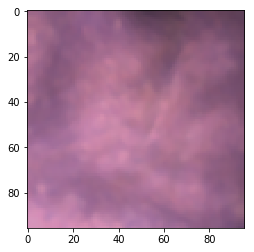

In [8]:
# !ls /kaggle/input/iitd-preprocessed/trainTestVal/train/0
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/kaggle/working/trainTestVal/train/0/img0001.bmp')
print(img.shape)
plt.imshow(img)
plt.show()

Get Mean RGB values and save to CSV

In [9]:

import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# get mean rgb values from all processed training images

train_dir1 = '/kaggle/working/trainTestVal/train/1'
img_files = os.listdir(train_dir1)

r_sum = g_sum = b_sum = 0
for file in tqdm(img_files):
    img = cv2.imread(os.path.join(train_dir1, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r_sum += np.sum(img[:, :, 0])/255
    g_sum += np.sum(img[:, :, 1])/255
    b_sum += np.sum(img[:, :, 2])/255

[img_sz_y, img_sz_x, _] = img.shape
r_avg = r_sum/(len(img_files)*img_sz_y*img_sz_x)
g_avg = g_sum/(len(img_files)*img_sz_y*img_sz_x)
b_avg = b_sum/(len(img_files)*img_sz_y*img_sz_x)

rgb_dict = { 'r': [r_avg], 'g': [g_avg], 'b':[b_avg]}

df = pd.DataFrame(rgb_dict)
df.to_csv('mean_rgb_val.csv', index=False)

100%|██████████| 2212/2212 [00:00<00:00, 6866.93it/s]


In [10]:
import os
from PIL import Image

def resize_images_in_directory(directory, save_directory):
    # Create the save directory if it does not exist
    os.makedirs(save_directory, exist_ok=True)
    
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)

        # Check if the file is an image
        if os.path.isfile(filepath):
            image = Image.open(filepath)
            image_resized = image.resize((96, 96), Image.LANCZOS)
            save_filepath = os.path.join(save_directory, filename)
            image_resized.save(save_filepath)

directory_list = ['/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/train/t',
                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/train/0',
                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/train/1',
                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/validation/t',

                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/validation/0',
                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/validation/1',
                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/test/t',
                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/test/0',
                  '/kaggle/input/iitd-traintestval/content/drive/MyDrive/trainTestVal/test/1']
save_directory_list = ['/kaggle/working/iitd/trainTestVal/train/t',
                  '/kaggle/working/iitd/trainTestVal/train/0',
                  '/kaggle/working/iitd/trainTestVal/train/1',
                  '/kaggle/working/iitd/trainTestVal/validation/t',

                  '/kaggle/working/iitd/trainTestVal/validation/0',
                  '/kaggle/working/iitd/trainTestVal/validation/1',
                  '/kaggle/working/iitd/trainTestVal/test/t',
                  '/kaggle/working/iitd/trainTestVal/test/0',
                  '/kaggle/working/iitd/trainTestVal/test/1']

for directory, save_directory in zip(directory_list, save_directory_list):
    resize_images_in_directory(directory, save_directory)


Shearlet Layer Based Model

In [11]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, AveragePooling2D, Input, Lambda, concatenate, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import os
import random
import numpy as np

class ShearletLayer(tf.keras.layers.Layer):
    def __init__(self, scales, angles, **kwargs):
        super(ShearletLayer, self).__init__(**kwargs)
        self.scales = scales
        self.angles = angles

    def build(self, input_shape):
        self.rows, self.cols = input_shape[1], input_shape[2]
        self.filters = self.create_shearlet_filters(self.rows, self.cols, self.scales, self.angles)
        self.num_filters = len(self.filters)
        super(ShearletLayer, self).build(input_shape)

    def shearlet_kernel(self, x, y, scale, angle):
        sigma = 1.6
        xi = 3.2
        gamma = 0.1
        theta = angle * np.pi / 4
        psi = 0
        phi = 0
        omega = 0
        scale_factor = (2 ** scale) * np.sqrt(2)
        x_ = x * np.cos(theta) + y * np.sin(theta)
        y_ = -x * np.sin(theta) + y * np.cos(theta)
        gaussian = np.exp(-(x_ ** 2 + y_ ** 2) / (2 * (sigma * scale_factor) ** 2))
        sinusoid = np.sin((np.pi * xi * x_) / (scale_factor * gamma) + psi)
        modulator = np.exp(1j * (np.pi * omega * x_) / scale_factor + phi)
        return gaussian * sinusoid * modulator




    def create_shearlet_filters(self, rows, cols, scales, angles):
        filters = []
        x, y = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')
        x = x.reshape(-1)
        y = y.reshape(-1)

        for scale in range(scales):
            for angle in range(angles):
                filter = self.shearlet_kernel(x, y, scale, angle)
                filter /= np.linalg.norm(filter)
                filters.append(filter.reshape((rows, cols)))

        return filters


    def shearlet_transform(self, img, scales, angles):
        if len(img.shape) == 2: 
            rows, cols = img.shape 
        else: 
            rows, cols, _ = img.shape

        filters = self.create_shearlet_filters(rows, cols, scales, angles)
        num_filters = len(filters)
        coefficients = tf.TensorArray(dtype=tf.float32, size=num_filters)

        img_fft = tf.signal.fft2d(tf.cast(img, tf.complex64))

        for i in range(num_filters):
            filter_fft = tf.signal.fft2d(tf.cast(filters[i], tf.complex64))
            filtered = tf.signal.ifft2d(img_fft * filter_fft)
            coefficients = coefficients.write(i, tf.math.real(filtered))

        return coefficients.stack()


    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        coefficients = tf.TensorArray(dtype=tf.float32, size=batch_size)
        for i in range(batch_size):
            input_img = inputs[i][:, :, 0]  # Assuming the last dimension is redundant
#             print("Input image shape:", inputs[i].shape)
            coefficients_per_image = self.shearlet_transform(input_img, self.scales, self.angles)
            coefficients = coefficients.write(i, coefficients_per_image)

        return coefficients.stack()
    
    def get_config(self):

        config = super().get_config()
        config.update({
            'scales': self.scales,
            'angles': self.angles,
        })
        return config


In [12]:
!rm -r /kaggle/working/models
# !ls /kaggle/input/iitd

rm: cannot remove '/kaggle/working/models': No such file or directory


****Model Training****

In [13]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Input, Lambda, concatenate, Dropout, Permute
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import os
import random
import numpy as np


M = 96
N = 96

batch_sz = 16
num_epochs = 48

train_path = '/kaggle/working/trainTestVal/train'
val_path = '/kaggle/working/trainTestVal/validation'
test_path = '/kaggle/working/trainTestVal/test'
classNames = ['no_match', 'match']

tf.compat.v1.disable_eager_execution()
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(gpus)
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
#             physical_gpus = tf.config.list_physical_gpus('GPU')
#             print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

# generates pairs of template + matching image and template + non-matching image
def generate_pairs(directory, shuffle=True):
    template_folder = os.path.join(directory, 't')
    pos_folder = os.path.join(directory, '1')
    neg_folder = os.path.join(directory, '0')

    num_images = len(os.listdir(template_folder))

    # Generate positive pairs
    pos_pairs = []
    template_idx = 0
    for i in range(num_images):
        template_idx += 1
        pos_idx = template_idx  # Use the same index for template and positive image
        template_file = os.path.join(template_folder, 'img{:04d}.bmp'.format(template_idx))
        pos_file = os.path.join(pos_folder, 'img{:04d}.bmp'.format(pos_idx))
        pos_pairs.append([template_file, pos_file, 1])
    # Generate negative pairs
    neg_pairs = []
    template_idx = 0
    for i in range(num_images):
        template_idx += 1
        neg_idx = template_idx  # Use the same index for template and neg image
        template_file = os.path.join(template_folder, 'img{:04d}.bmp'.format(template_idx))
        neg_file = os.path.join(neg_folder, 'img{:04d}.bmp'.format(neg_idx))
        neg_pairs.append([template_file, neg_file, 0])

    all_pairs = pos_pairs + neg_pairs
    if shuffle:
        random.shuffle(all_pairs)

    return all_pairs


# splits images and target value
def separateList(dataset_list):
    dataset_pairs = [[lst[0], lst[1]] for lst in dataset_list]
    dataset_labels = [lst[2] for lst in dataset_list]
    return dataset_pairs, dataset_labels


# function to load and preprocess images
def load_and_preprocess_image(image_path, mean_rgb):
    # load image from file path
    image = tf.io.read_file(image_path)
    # decode jpeg encoded image
    image = tf.image.decode_bmp(image, channels=3)
    # normalize pixel values to be in the range [0, 1] and subtract r,g,b mean
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.subtract(image, mean_rgb)
    return image


# confusion matrix generation
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizes Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
    print(cm)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#get mean RGB for preprocessing
mean_rgb_file = 'mean_rgb_val.csv'
if os.path.isfile(mean_rgb_file):
    mean_rgb = pd.read_csv(mean_rgb_file)
    mean_rgb = np.array(mean_rgb)
else:
    print(f'Error: CSV file "{mean_rgb_file}" not found.')
    mean_rgb = np.array([0.641855879, 0.523251229, 0.51696453])  # load default


# generate image pairs and labels for train, val and test. Test and Val sets are shuffled
train_set = generate_pairs(train_path)
val_set = generate_pairs(val_path)
test_set = generate_pairs(test_path, False)

train_pairs, train_labels = separateList(train_set)
val_pairs, val_labels = separateList(val_set)
test_pairs, test_labels = separateList(test_set)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

# create training dataset from pairs and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_pairs, train_labels))
#map image loading and preprocessing function to the training pairs
train_dataset = train_dataset.map(lambda x, y: ((load_and_preprocess_image(x[0], mean_rgb), load_and_preprocess_image(x[1], mean_rgb)), y))
# batch the training dataset
train_dataset = train_dataset.batch(batch_sz)

# create validation dataset from pairs and labels
val_dataset = tf.data.Dataset.from_tensor_slices((val_pairs, val_labels))
# map image loading and preprocessing function to the validation pairs
val_dataset = val_dataset.map(lambda x, y: ((load_and_preprocess_image(x[0], mean_rgb), load_and_preprocess_image(x[1], mean_rgb)), y))
# batch the validation dataset
val_dataset = val_dataset.batch(batch_sz)

# create validation dataset from pairs and labels
test_dataset = tf.data.Dataset.from_tensor_slices((test_pairs, test_labels))
# map image loading and preprocessing function to the validation pairs
test_dataset = test_dataset.map(lambda x, y: ((load_and_preprocess_image(x[0], mean_rgb), load_and_preprocess_image(x[1], mean_rgb)), y))
test_dataset = test_dataset.batch(16)

input_shape = (M, N, 3)
# input_shape = (M, N, 1)
template_input = Input(input_shape)
test_input = Input(input_shape)

# left and right twin branches of the network
# convnet = Sequential([
#     Conv2D(8, (23, 23), activation='relu', input_shape=input_shape),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(16, (13, 13), activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(32, (7, 7), activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(48, (5, 5), activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPool2D(pool_size=(2, 2), strides=2),
#     Conv2D(64, (3, 3), activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPool2D(pool_size=(2, 2), strides=1),
#     Conv2D(96, (3, 3), activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPool2D(pool_size=(2, 2), strides=1),
#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     Flatten(),
# ])
print(template_input.shape, test_input.shape)
# shearnet = Sequential([
#         # Define input layer
#         Input(shape=input_shape),
        
#         # Define 2D Scattering transform layer
#         ShearletLayer(scales=1, angles=2),
#         Permute((2, 3, 1)),
        
#         Conv2D(8, (23, 23), activation='relu', input_shape=input_shape),
#         BatchNormalization(),
#         Activation('relu'),
#         MaxPool2D(pool_size=(2, 2), strides=2),
#         Conv2D(16, (13, 13), activation='relu'),
#         BatchNormalization(),
#         Activation('relu'),
#         MaxPool2D(pool_size=(2, 2), strides=2),
#         Conv2D(32, (7, 7), activation='relu'),
#         BatchNormalization(),
#         Activation('relu'),
#         MaxPool2D(pool_size=(2, 2), strides=2),
#         Conv2D(48, (5, 5), activation='relu'),
#         BatchNormalization(),
#         Activation('relu'),
#         MaxPool2D(pool_size=(2, 2), strides=2),
#         Conv2D(64, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Activation('relu'),
#         MaxPool2D(pool_size=(2, 2), strides=1),
#         Conv2D(96, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Activation('relu'),
#         MaxPool2D(pool_size=(2, 2), strides=1),
#         Conv2D(128, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Activation('relu'),
#         Flatten(),
#     ])

shearnet = Sequential([
        # Define input layer
        Input(shape=input_shape),

        # Define 2D Scattering transform layer
        ShearletLayer(scales=1, angles=2),
        Permute((2, 3, 1)),

        # Define convolutional layers
        Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2), strides=2),

        Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv2'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2), strides=2),

        Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv3'),
        BatchNormalization(),
        AveragePooling2D(pool_size=(2, 2), strides=2),

        Flatten(),
])
print("shearnet summary:")
# convnet.summary()
# encoded_l = convnet(template_input)
# encoded_r = convnet(test_input)
shearnet.summary()
encoded_l = shearnet(template_input)
encoded_r = shearnet(test_input)

# merged part of the network
merged = concatenate([encoded_l, encoded_r])
merged = Dropout(0.5)(merged)
merged = Dense(512, activation='relu')(merged)
merged = Dropout(0.5)(merged)
merged = Dense(128, activation='relu')(merged)
merged = Dropout(0.5)(merged)
prediction = Dense(1, activation='sigmoid')(merged)

siamese_model = Model(inputs=[template_input, test_input], outputs=prediction)

siamese_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

print("siamese summary:")
siamese_model.summary()

# set checkpoints to save after each epoch
checkpoint_filepath = './models/model_checkpoint.h5'
os.makedirs('./models', exist_ok=True)

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor for reduction (e.g., validation loss)
    factor=0.1,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement before reducing the learning rate
    min_lr=0.00001,       # Minimum learning rate (stop reducing when it reaches this value)
    verbose=1             # 1: Update messages, 0: No updates
)
early_stop = EarlyStopping(
    monitor='loss',
    patience=15,
    restore_best_weights=True
)
# continue training from last checkpoint if the model was trained earlier
if os.path.isfile('./models/model_checkpoint.h5'):
    siamese_model = load_model('./models/model_checkpoint.h5')

history = siamese_model.fit(x=train_dataset, validation_data=val_dataset, epochs=num_epochs, callbacks=[model_checkpoint_callback, reduce_lr])

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
(None, 96, 96, 3) (None, 96, 96, 3)
shearnet summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
shearlet_layer (ShearletLaye (None, 2, 96, 96)         0         
_________________________________________________________________
permute (Permute)            (None, 96, 96, 2)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 96, 96, 32)        608       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
C

In [14]:
import matplotlib.pyplot as plt
# Assuming test_dataset contains test images and test_labels contains their true labels
# Predict labels using the Siamese model
predictions = siamese_model.predict(test_dataset)
rounded_predictions = np.floor(predictions + 0.5).astype(int)

print(test_dataset)

<BatchDataset shapes: (((None, None, None, 3), (None, None, None, 3)), (None,)), types: ((tf.float32, tf.float32), tf.int64)>


Test Accuracy = 
0.9708520179372198
Confusion Matrix, without normalization
[[212  11]
 [  2 221]]
False Acceptance Rate (FAR): 0.04932735426008968
False Rejection Rate (FRR): 0.008968609865470852
Equal Error Rate (EER): 0.02242152466367713
Threshold at EER: 0.9360702


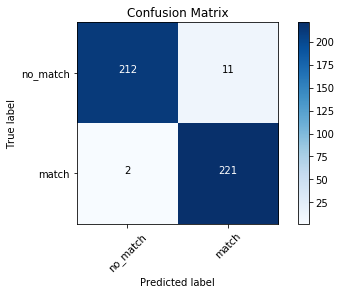

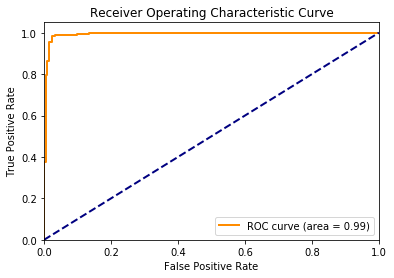

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate FAR and FRR
def calculate_far_frr(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    total_positive = np.sum(y_true)
    total_negative = len(y_true) - total_positive
    
    false_acceptance = cm[0, 1] / total_negative
    false_rejection = cm[1, 0] / total_positive
    
    return false_acceptance, false_rejection

# Calculate EER
def calculate_eer(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    eer_threshold = thresholds[np.argmin(np.abs(fpr - (1 - tpr)))]
    eer = fpr[np.argmin(np.abs(fpr - (1 - tpr)))]
    
    return eer, eer_threshold

# Plot ROC Curve and Calculate AUC
def plot_roc_auc(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

# Calculate predictions, rounded predictions, and confusion matrix
predictions = siamese_model.predict(x=test_dataset)
rounded_predictions = np.floor(predictions + 0.5).astype(int)

cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm_plot_labels = ['no_match', 'match']

print("Test Accuracy = ")
print(np.sum(test_labels == rounded_predictions.reshape(1, len(rounded_predictions)))/len(test_labels))

# Print confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Calculate FAR and FRR
far, frr = calculate_far_frr(test_labels, rounded_predictions)
print("False Acceptance Rate (FAR):", far)
print("False Rejection Rate (FRR):", frr)

# Calculate EER
eer, eer_threshold = calculate_eer(test_labels, predictions)
print("Equal Error Rate (EER):", eer)
print("Threshold at EER:", eer_threshold)

# Plot ROC Curve and Calculate AUC
plot_roc_auc(test_labels, predictions)


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

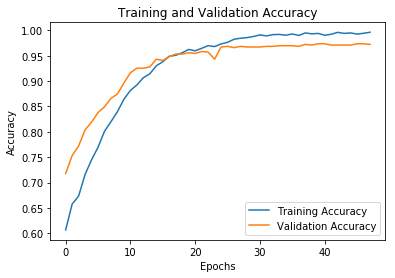

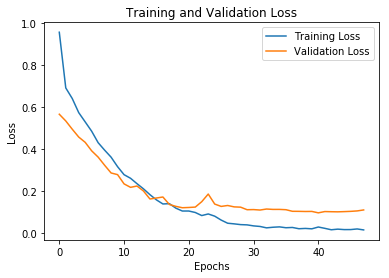

In [16]:
import matplotlib.pyplot as plt

def plot_curves(history):
    # Plot training and validation accuracy values
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss values
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming you have a `history` object containing training and validation metrics
plot_curves(history)


## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!